In [1]:
import tensorflow as tf
from core.model import ModelMNIST10x10_base

class Implement(ModelMNIST10x10_base):
    def __init__(self, batch_size=128, opt=tf.train.MomentumOptimizer(0.1, 0.9, use_nesterov=True)):
        super(Implement, self).__init__(batch_size, opt)

    def compute_gradient(self, cost, var_refs):
        grads = tf.gradients(
                cost, var_refs,
                grad_ys=None, aggregation_method=None, colocate_gradients_with_ops=True)
        
        for l, g, v in zip(range(len(grads)), grads, var_refs):
            delta = g
            tf.summary.histogram('{}'.format(v.name.replace(':', '_')), v)
            tf.summary.histogram('{}/gradient'.format(v.name.replace(':', '_')), g)
            tf.summary.histogram('{}/delta'.format(v.name.replace(':', '_')), delta)
            
        return grads

In [2]:
import sys
import logging
logging.basicConfig(level=logging.INFO, format='[%(levelname)s] %(message)s', stream=sys.stdout)

model = Implement(batch_size=128)

[1129 11:56:25 @fs.py:89] WRN Env var $TENSORPACK_DATASET not set, using /root/tensorpack_data for datasets.
[1129 11:56:25 @prefetch.py:169] [PrefetchData] Will fork a dataflow more than one times. This assumes the datapoints are i.i.d.


In [3]:
from core.utils import loop

%env CUDA_VISIBLE_DEVICES=0
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.1
sess = tf.Session(config=config)
history = loop(sess, model, 30, './summary/5_1_first_order_optimization_batch_128')

env: CUDA_VISIBLE_DEVICES=0
[INFO] session initialized
[INFO] [0000] [train] cost:0.184 accuracy:0.635 elapsed:2.256sec [valid] cost:0.084 accuracy:0.866 elapsed:0.128sec
[INFO] [0001] [train] cost:0.075 accuracy:0.884 elapsed:1.207sec [valid] cost:0.060 accuracy:0.906 elapsed:0.118sec
[INFO] [0002] [train] cost:0.060 accuracy:0.909 elapsed:1.262sec [valid] cost:0.050 accuracy:0.926 elapsed:0.128sec
[INFO] [0003] [train] cost:0.051 accuracy:0.925 elapsed:1.209sec [valid] cost:0.044 accuracy:0.938 elapsed:0.112sec
[INFO] [0004] [train] cost:0.047 accuracy:0.930 elapsed:1.187sec [valid] cost:0.043 accuracy:0.938 elapsed:0.117sec
[INFO] [0005] [train] cost:0.043 accuracy:0.936 elapsed:1.239sec [valid] cost:0.039 accuracy:0.944 elapsed:0.116sec
[INFO] [0006] [train] cost:0.041 accuracy:0.939 elapsed:1.234sec [valid] cost:0.037 accuracy:0.945 elapsed:0.115sec
[INFO] [0007] [train] cost:0.039 accuracy:0.943 elapsed:1.229sec [valid] cost:0.036 accuracy:0.950 elapsed:0.129sec
[INFO] [0008] [tr

average elapsed time train:1.226472sec valid:0.117672sec


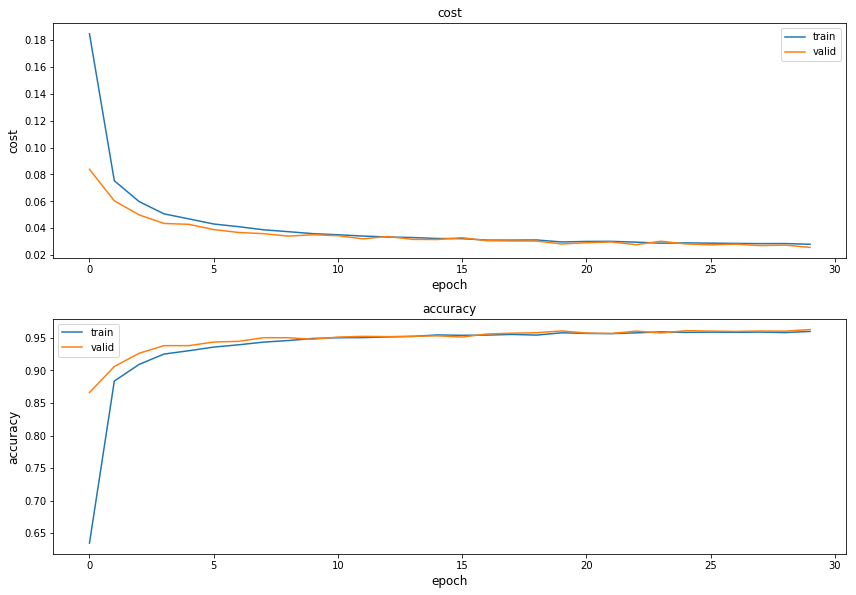

In [4]:
import matplotlib
%matplotlib inline

from core.utils import plot_jupyter
plot_jupyter(history)